<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     248 non-null    object        
 1   Date       248 non-null    datetime64[ns]
 2   Open       248 non-null    float64       
 3   High       248 non-null    float64       
 4   Low        248 non-null    float64       
 5   Close      248 non-null    float64       
 6   Adj Close  248 non-null    float64       
 7   Volume     248 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 15.6+ KB
None
                                Date        Open        High         Low  \
count                            248  248.000000  248.000000  248.000000   
mean   2023-03-22 22:27:05.806451712  215.252093  217.919662  212.697452   
min              2023-02-07 00:00:00   89.540001   90.129997   88.860001   
25%              2023-03-01 00:00:0

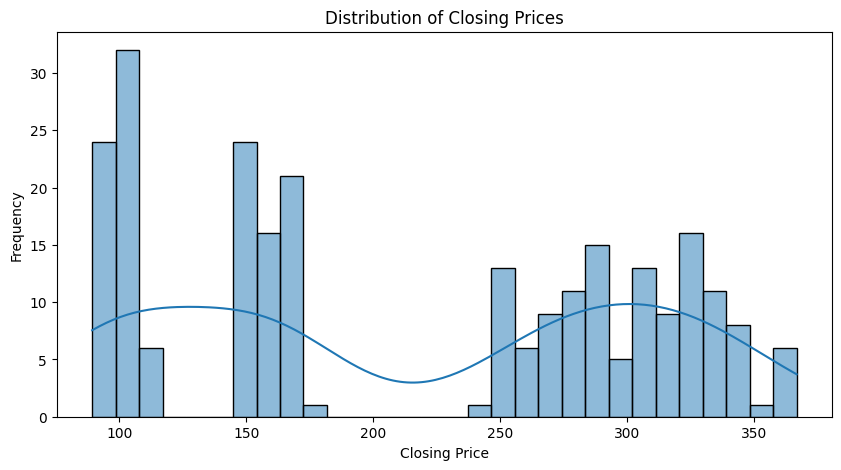

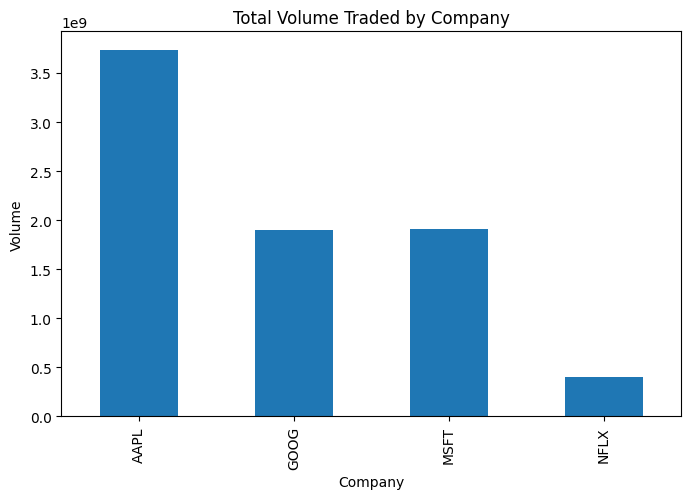

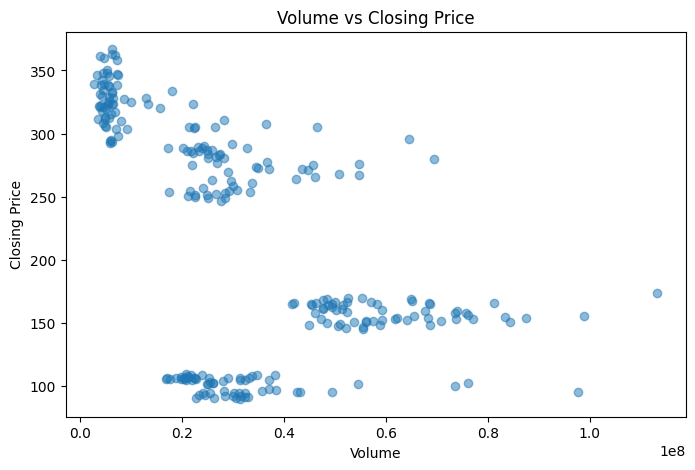

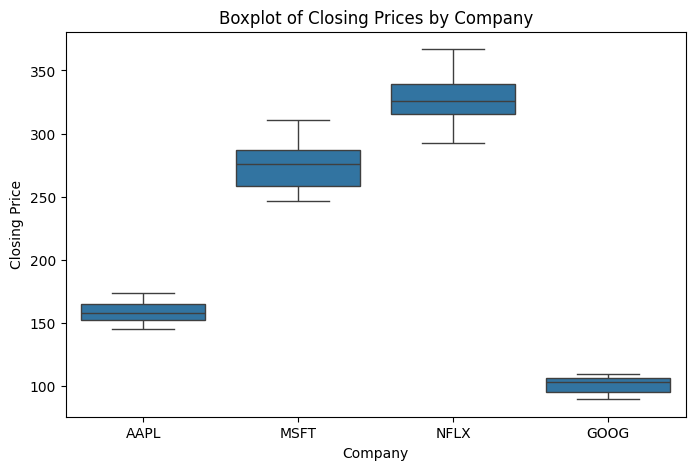

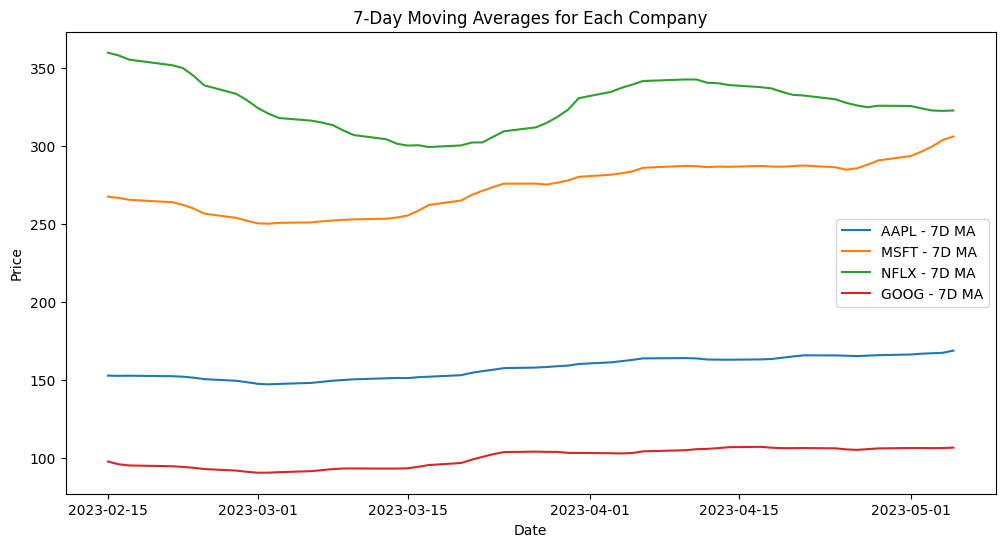

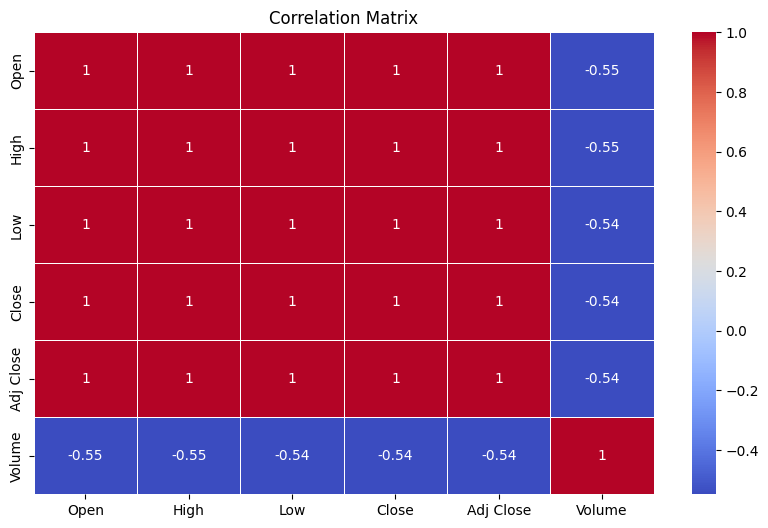

In [21]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('stocks.csv')

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Basic Data Check
print(data.info())
print(data.describe())

# Check for null values
print(data.isnull().sum())

# Filter stock tickers
tickers = data['Ticker'].unique()
print("Tickers available:", tickers)

# EDA: Closing Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Close'], bins=30, kde=True)
plt.title("Distribution of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

# Total Volume by Ticker
plt.figure(figsize=(8, 5))
data.groupby('Ticker')['Volume'].sum().plot(kind='bar')
plt.title('Total Volume Traded by Company')
plt.ylabel('Volume')
plt.xlabel('Company')
plt.show()

# Volume vs Closing Price
plt.figure(figsize=(8, 5))
plt.scatter(data['Volume'], data['Close'], alpha=0.5)
plt.title("Volume vs Closing Price")
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.show()

# Boxplot of Closing Prices
plt.figure(figsize=(8, 5))
sns.boxplot(x='Ticker', y='Close', data=data)
plt.title("Boxplot of Closing Prices by Company")
plt.xlabel("Company")
plt.ylabel("Closing Price")
plt.show()

# Moving Averages and Volatility
plt.figure(figsize=(12, 6))
for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker].copy()
    ticker_data = ticker_data.sort_values('Date')
    ticker_data['MA_7'] = ticker_data['Close'].rolling(window=7).mean()
    ticker_data['Volatility'] = ticker_data['Close'].rolling(window=7).std()

    plt.plot(ticker_data['Date'], ticker_data['MA_7'], label=f'{ticker} - 7D MA')

plt.legend()
plt.title("7-Day Moving Averages for Each Company")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# Correlation Matrix
corr = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
